<a href="https://colab.research.google.com/github/easy-min/dacon_/blob/main/dacon_music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info.

train.csv [파일]
25383개의 데이터
ID : 음악 샘플 고유 ID
음악 샘플의 특징 정보
danceability
energy
key
loudness
speechiness
acousticness 
instrumentalness
liveness
valence
tempo
duration : 음악 재생 시간(길이) (초)
genre : 음악 장르 (총 15개 종류)
Underground Rap
Dark Trap
trance
Hiphop
trap
techhouse
techno
psytrance
hardstyle
dnb
RnB
Trap Metal
Rap
Emo
Pop
 

test.csv [파일]
16922개의 데이터
ID : 음악 샘플 고유 ID
음악 샘플의 특징 정보
danceability
energy
key
loudness
speechiness
acousticness 
instrumentalness
liveness
valence
tempo
duration : 음악 재생 시간(길이) (초)
 

sample_submission.csv [제출양식]
ID : 샘플 별 고유 ID
genre : 분류한 음악 장르 (총 15개 종류)
Underground Rap
Dark Trap
trance
Hiphop
trap
techhouse
techno
psytrance
hardstyle
dnb
RnB
Trap Metal
Rap
Emo
Pop


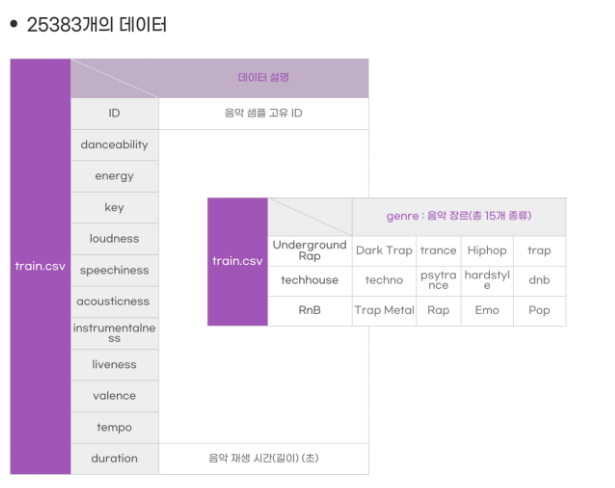

# [1] 시작하기에 앞서서서

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns           # matplotlib을 기본으로 다양한 시각화 기법을 제공하는 라이브러리
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

seaborn의 특징

- Histplot : 가장 기본적으로 사용되는 히스토그램을 출력하는 plot (전체 데이터를 특정 구역별로 확인할 때 사용)
- Displot :  distribution들을 여러 subplot들로 나눠서 출력해주는 plot (displot에 kind를 변경하는 것으로, histplot, kdeplot, ecdfplot 모두 출력이 가능)
- Barplot : 막대그래프
- Boxplot : 데이터의 각 종류별로 4분위 수를 표시하는 plot



In [3]:
# csv 데이터 가져오기, id를 인덱스로 지정
music_dt = pd.read_csv("/content/drive/My Drive/dacon/music/train.csv", index_col='ID')

In [4]:
music_dt

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
ID,,,,,,,,,,,,
TRAIN_00000,0.3341,0.9231,10,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175,trap
TRAIN_00001,0.6344,0.5955,10,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513,techno
TRAIN_00002,0.3983,0.1107,8,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151,Trap Metal
TRAIN_00003,0.3139,0.9702,2,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246,trap
TRAIN_00004,0.0735,0.9452,5,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_25378,0.8814,0.3398,6,0.4602,0.3825,0.4505,0.0000,0.4222,0.8753,0.4081,88,Underground Rap
TRAIN_25379,0.7505,0.5657,0,0.6682,0.1038,0.1281,0.0000,0.0596,0.9583,0.4273,123,Trap Metal
TRAIN_25380,0.2520,0.7617,8,0.4928,0.0410,0.0003,0.8395,0.0843,0.1372,0.7828,353,dnb


In [5]:
print(music_dt.columns) # 컬럼 수 확인
display(music_dt.info()) # ID 제외한 데이터 확인 - NA 없음

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'genre'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 25383 entries, TRAIN_00000 to TRAIN_25382
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      25383 non-null  float64
 1   energy            25383 non-null  float64
 2   key               25383 non-null  int64  
 3   loudness          25383 non-null  float64
 4   speechiness       25383 non-null  float64
 5   acousticness      25383 non-null  float64
 6   instrumentalness  25383 non-null  float64
 7   liveness          25383 non-null  float64
 8   valence           25383 non-null  float64
 9   tempo             25383 non-null  float64
 10  duration          25383 non-null  int64  
 11  genre             25383 non-null  object 
dtypes: float64(9), int64(2),

None

In [6]:
music_dt.describe() # key와 duration 정규화 필요

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000
mean,0.544519,0.642106,5.368239,0.523904,0.271701,0.178736,0.309931,0.324461,0.403999,0.503558,253.697514
std,0.242362,0.275050,3.660011,0.209811,0.276586,0.272155,0.399725,0.254626,0.286148,0.222104,103.020340
min,0.000000,0.000000,0.000000,0.000000,0.001100,0.000000,0.000000,0.000000,0.000000,0.007300,28.000000
25%,0.340500,0.410000,1.000000,0.372900,0.062950,0.003700,0.000000,0.138100,0.148000,0.322350,182.000000
50%,0.553400,0.701300,6.000000,0.538300,0.129600,0.035800,0.006500,0.200700,0.361800,0.483500,227.000000
75%,0.759900,0.895700,9.000000,0.683600,0.450200,0.237500,0.814000,0.501500,0.640800,0.659350,304.000000
max,1.000000,1.000000,11.000000,0.999500,1.000000,0.999900,1.000000,1.000000,1.000000,1.000000,897.000000


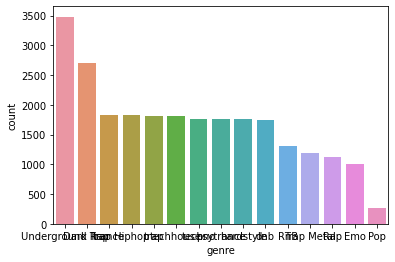

In [7]:
sns.countplot(x=music_dt['genre'], order=music_dt['genre'].value_counts().index)

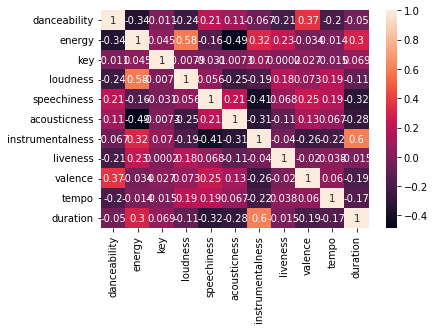

In [8]:
music_dt.corr() # 상관관계
sns.heatmap(music_dt.corr(), annot = True)

In [9]:
def CHECK (*args): # 변수별로 빈도수 확인
  for arg in args:
    sns.displot(music_dt, x = arg, bins = 15)

def CHECK2 (*args): # 장르별 변수 빈도수 확인
  for arg in args:
    sns.displot(music_dt, x = arg, bins = 15, hue = "genre")

def CHECK3 (*args): # 장르별 변수 빈도수 정규화 확인
  for arg in args:
    sns.displot(music_dt, x = arg, bins = 15, hue = "genre", stat = "density", common_norm = False) # 그룹별로 정규화화

In [ ]:
CHECK('danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration')
CHECK2('danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration')
CHECK3('danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration')

# [2] 분류 모델

In [13]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [14]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [33]:
train = pd.read_csv("/content/drive/My Drive/dacon/music/train.csv")
test = pd.read_csv("/content/drive/My Drive/dacon/music/test.csv")

In [34]:
train = train.drop(["ID"], axis = 1)
test = test.drop(["ID"], axis = 1)

In [35]:
train = train.replace({'Underground Rap':0, 'Dark Trap':1,'trance':2,'Hiphop':3,'trap':4, 'techhouse':5, 'techno':6, 'psytrance':7,'hardstyle':8, 'dnb':9, 'RnB':10, 'Trap Metal':11, 'Rap':12, 'Emo':13, 'Pop':14})
test = test.replace({'Underground Rap':0, 'Dark Trap':1,'trance':2,'Hiphop':3,'trap':4, 'techhouse':5, 'techno':6, 'psytrance':7,'hardstyle':8, 'dnb':9, 'RnB':10, 'Trap Metal':11, 'Rap':12, 'Emo':13, 'Pop':14})

In [36]:
X = train.drop(['genre'], axis = 1)
y = train['genre']

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.15)

In [40]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
val_pred = model.predict(X_valid)
print("현재 Macro F1 Score 점수는 {}입니다".format(f1_score(val_pred,y_valid, average= 'macro')))

현재 Macro F1 Score 점수는 0.6346425182608347입니다


In [24]:
from sklearn.preprocessing import MinMaxScaler
x = train[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']]
print(x.values)

[[3.341e-01 9.231e-01 1.000e+01 ... 7.902e-01 5.391e-01 1.750e+02]
 [6.344e-01 5.955e-01 1.000e+01 ... 4.162e-01 3.043e-01 5.130e+02]
 [3.983e-01 1.107e-01 8.000e+00 ... 4.291e-01 2.324e-01 1.510e+02]
 ...
 [2.520e-01 7.617e-01 8.000e+00 ... 1.372e-01 7.828e-01 3.530e+02]
 [6.202e-01 3.455e-01 0.000e+00 ... 1.940e-02 9.756e-01 1.200e+02]
 [8.963e-01 4.435e-01 9.000e+00 ... 3.320e-01 4.069e-01 2.280e+02]]


In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x) ## 각 칼럼 데이터마다 변환할 함수 생성
transformed_x = scaler.transform(x) ## fit에서 만들어진 함수를 실제로 데이터에 적용
print(transformed_x)

[[0.3341     0.9231     0.90909091 ... 0.7902     0.53571069 0.16915995]
 [0.6344     0.5955     0.90909091 ... 0.4162     0.29918404 0.55811277]
 [0.3983     0.1107     0.72727273 ... 0.4291     0.22675531 0.141542  ]
 ...
 [0.252      0.7617     0.72727273 ... 0.1372     0.78120278 0.3739931 ]
 [0.6202     0.3455     0.         ... 0.0194     0.97542057 0.10586881]
 [0.8963     0.4435     0.81818182 ... 0.332      0.40253853 0.2301496 ]]


In [41]:
scaler.fit(X_train)

MinMaxScaler()

In [49]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최소값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최소값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(X_train_scaled.max(axis=0)))

# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_valid)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n{}".format(X_valid_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n{}".format(X_valid_scaled.max(axis=0)))

변환된 후 크기: (21575, 11)
스케일 조정 전 특성별 최소값:
 danceability         0.0000
energy               0.0000
key                  0.0000
loudness             0.0017
speechiness          0.0011
acousticness         0.0000
instrumentalness     0.0000
liveness             0.0047
valence              0.0000
tempo                0.0073
duration            28.0000
dtype: float64
스케일 조정 전 특성별 최대값:
 danceability          1.0000
energy                1.0000
key                  11.0000
loudness              0.9910
speechiness           1.0000
acousticness          0.9999
instrumentalness      1.0000
liveness              1.0000
valence               0.9973
tempo                 1.0000
duration            897.0000
dtype: float64
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
스케일 조정 후 특성별 최소값:
[ 0.0046      0.          0.         -0.00171839  0.00140154  0.
  0.         -0.00472219  0.          0.00866324  0.0264672 ]
스케일 조정 후 특성별 최대값:
[0.9934     

In [50]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [51]:
model2 = RandomForestClassifier(random_state = 42)
model2.fit(X_train_scaled, y_train)
val_pred2 = model2.predict(X_valid_scaled)
print("현재 Macro F1 Score 점수는 {}입니다".format(f1_score(val_pred2,y_valid, average= 'macro')))

현재 Macro F1 Score 점수는 0.6346347474066181입니다


In [52]:
from sklearn.svm import SVC
svm = SVC(gamma='auto', C=100)
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_valid_scaled, y_valid)))

스케일 조정된 테스트 세트의 정확도: 0.66
